# Clustering Experiments with Apogee stellar data and extragalactic globular clusters

In this workbook I'm going to apply machine learning algorithms to Galactic Archaeology. I'm looking for chemistry patterns in the stellar data from the Apogee survey of the Galactic bulge.  The data was obtained by querying the SQL database for Data Release 13. (http://www.sdss.org/dr13/).  My main tools will be pandas and matplotlib. 

I will compare to chemistry data from extragalactic globular clusters with the goal of determining if they separate into similar clusters.  

## Results
In the exploratory analysis in "apogee_ML" I found that the chemistry of the stars separates the halo and disk populations, particularly in the alpha_m and fe_h space. I confirm that the populations separate into similar groups when only a subset of the chemical elements are used, since only a smaller subset of chemical data is available for the new sample of globular clusters, and I want to be consistent in how I am classifying the groups. 

When the analysis of the globular clusters is performed, I find that the groups don't overlap as I would expect in the alpha_m and fe_h space.  With further digging into the individual elements that combine to make alpha_m (Ca, Ti I, Ti II, Si I), I find that Ti is driving some of the discrepancy.  I conclude that systematic offsets in the analysis of this element are affecting the comparison. 

## Globular cluster data
This data is pulled from my own research using integrated light spectra of globular clusters. This includes globular clusters in both our own galaxy (Milky Way) and Andromeda (M31).  As extragalactic star clusters are more difficult to analyze (both because of their distance and because they are composite populations of stars instead of individual stars), there is a smaller subset of chemical abundance results available than for Apogee. Therefore, I've trimmed the Apogee results to be consistent with the globular clusters. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import string
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [3]:
#Read in Apogee data, check size
df=pd.read_csv('MyTable_1_morley.csv')
len(df.index)

10000

In [ ]:
#Is everything loaded correctly? what do the data look like?
df[:10]


In [ ]:
#check out contents
df.info()

In [ ]:
#The last two columns include warning flags, check out what they are 
df[df.Column1 != 'null'].Column1.unique()

In [ ]:
df[df.Column2 != 'null'].Column2.unique()


In [4]:
# "Column2" seems like the more serious issues so let's dump the flagged entries
# 
#df=df[df.Column1 != 'null']
df=df[df.Column2 == 'null']
#how many are left?
len(df.index)

4557

In [ ]:
#check out the radial velocity distribution
df.vhelio_avg.hist(color="darkcyan",alpha=0.8)
grid('off')
plt.xlabel(r'Velocity',fontsize=12)
plt.ylabel(r'N',fontsize=12)

In [ ]:
#check out the stellar temperatures (no bad values)
df.teff.hist(color='darkcyan')
grid('off')
plt.xlabel(r'Temperature (K)',fontsize=12)
plt.ylabel(r'N',fontsize=12)

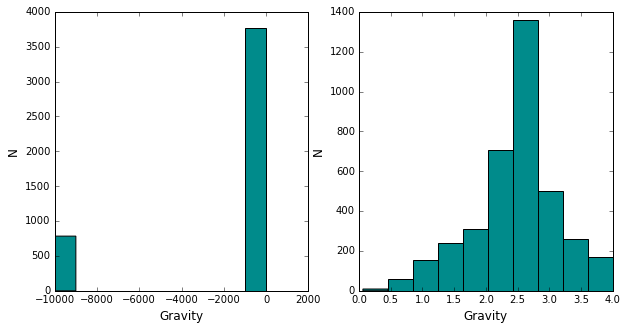

In [5]:
#Look at the gravities -- bad values are listed -9999, let's get rid of those stars
plt.subplot(121)
df.logg.hist(color='darkcyan')#,figsize=(10,5))
grid('off')
plt.xlabel(r'Gravity',fontsize=12)
plt.ylabel(r'N',fontsize=12)
plt.subplot(122)
df=df[df.logg >0]
df[df.logg>0].logg.hist(color='darkcyan')
grid('off')
plt.xlabel(r'Gravity',fontsize=12)
plt.ylabel(r'N',fontsize=12)

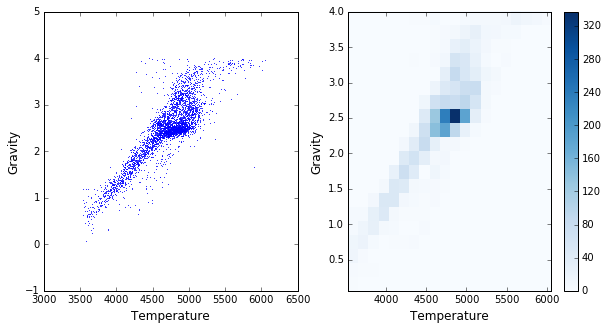

In [6]:
# temperature vs gravity...density plot is also useful here
plt.subplot(121)

plt.scatter(df.teff,df.logg,marker='o',linewidth=0,s=1)
plt.xlabel(r'Temperature',fontsize=12)
plt.ylabel(r'Gravity',fontsize=12)
plt.subplot(122)

plt.hist2d(df.teff,df.logg, (20, 20), cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel(r'Temperature',fontsize=12)
plt.ylabel(r'Gravity',fontsize=12)

In [7]:
#Take the subset of data (chemical abundances and star properties) that we want to analyze
df_params=df[[ 'na_fe',
 'al_fe',
 'si_fe',
 'ca_fe',
 'ti_fe',
 'tiii_fe',
 'v_fe',
 'cr_fe',
 'mn_fe',
 'co_fe',
 'ni_fe',
 'cu_fe', 'alpha_m','fe_h']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112a170d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117b3ad50>]], dtype=object)

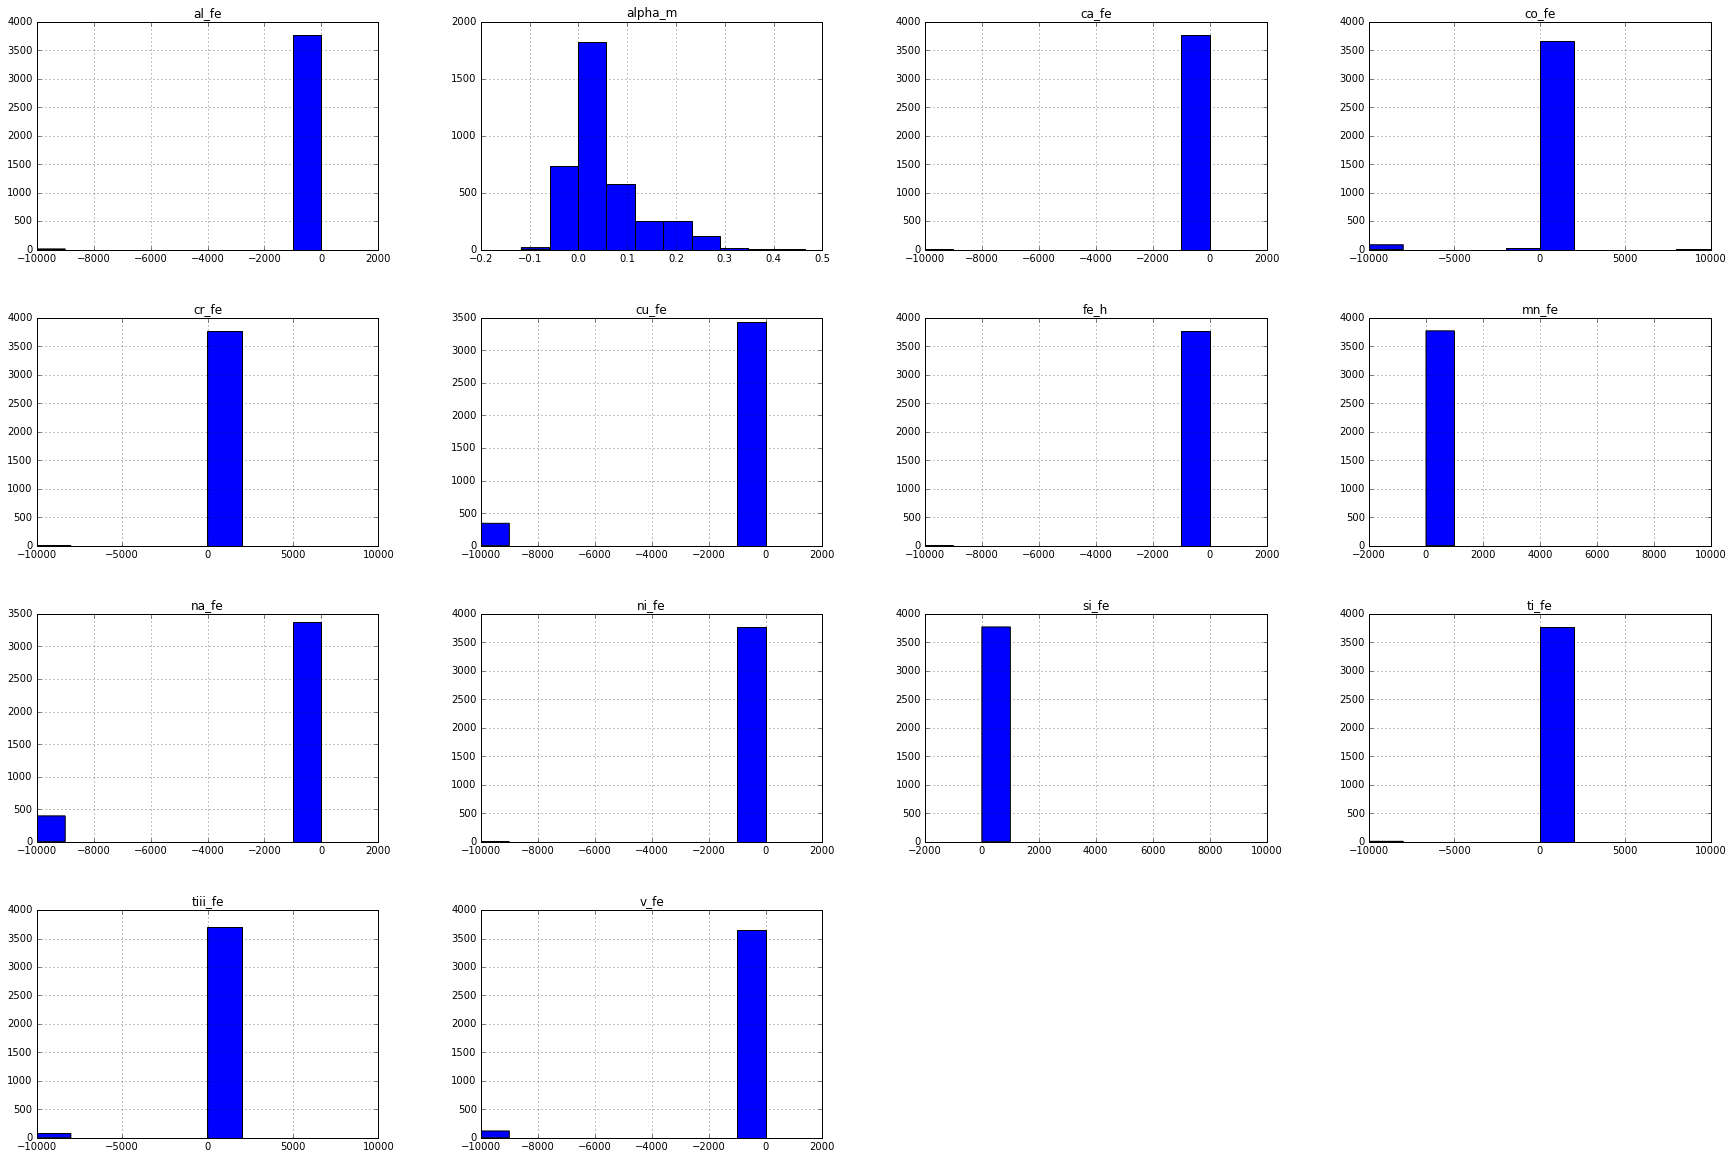

In [8]:
# Check out the chemical abundance distributions: There is an alpha and M value for every star, 
# but the other elements have missing values (represented by -9999)
df_params.hist(figsize=(30,20))

2891

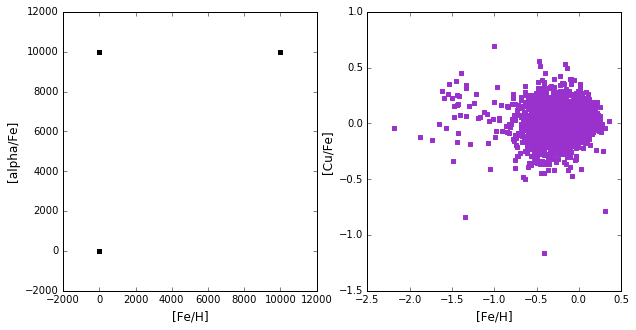

In [10]:
# Some bad values at both -9999 and 9999.  For now eliminate rows where one value is bad
plt.subplot(121)
plt.scatter(np.abs(df_params.fe_h),np.abs(df_params.cu_fe),marker='s',color='k')
plt.xlabel(r'[Fe/H]',fontsize=12)
plt.ylabel(r'[alpha/Fe]',fontsize=12)
df_clip=df_params[(np.abs(df_params) < 8000).all(axis=1)]

plt.subplot(122)
plt.scatter(df_clip.fe_h,df_clip.cu_fe,marker='s',color='darkorchid',s=10)
plt.xlabel(r'[Fe/H]',fontsize=12)
plt.ylabel(r'[Cu/Fe]',fontsize=12)
len(df_clip.index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117c68550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11abd4710>]], dtype=object)

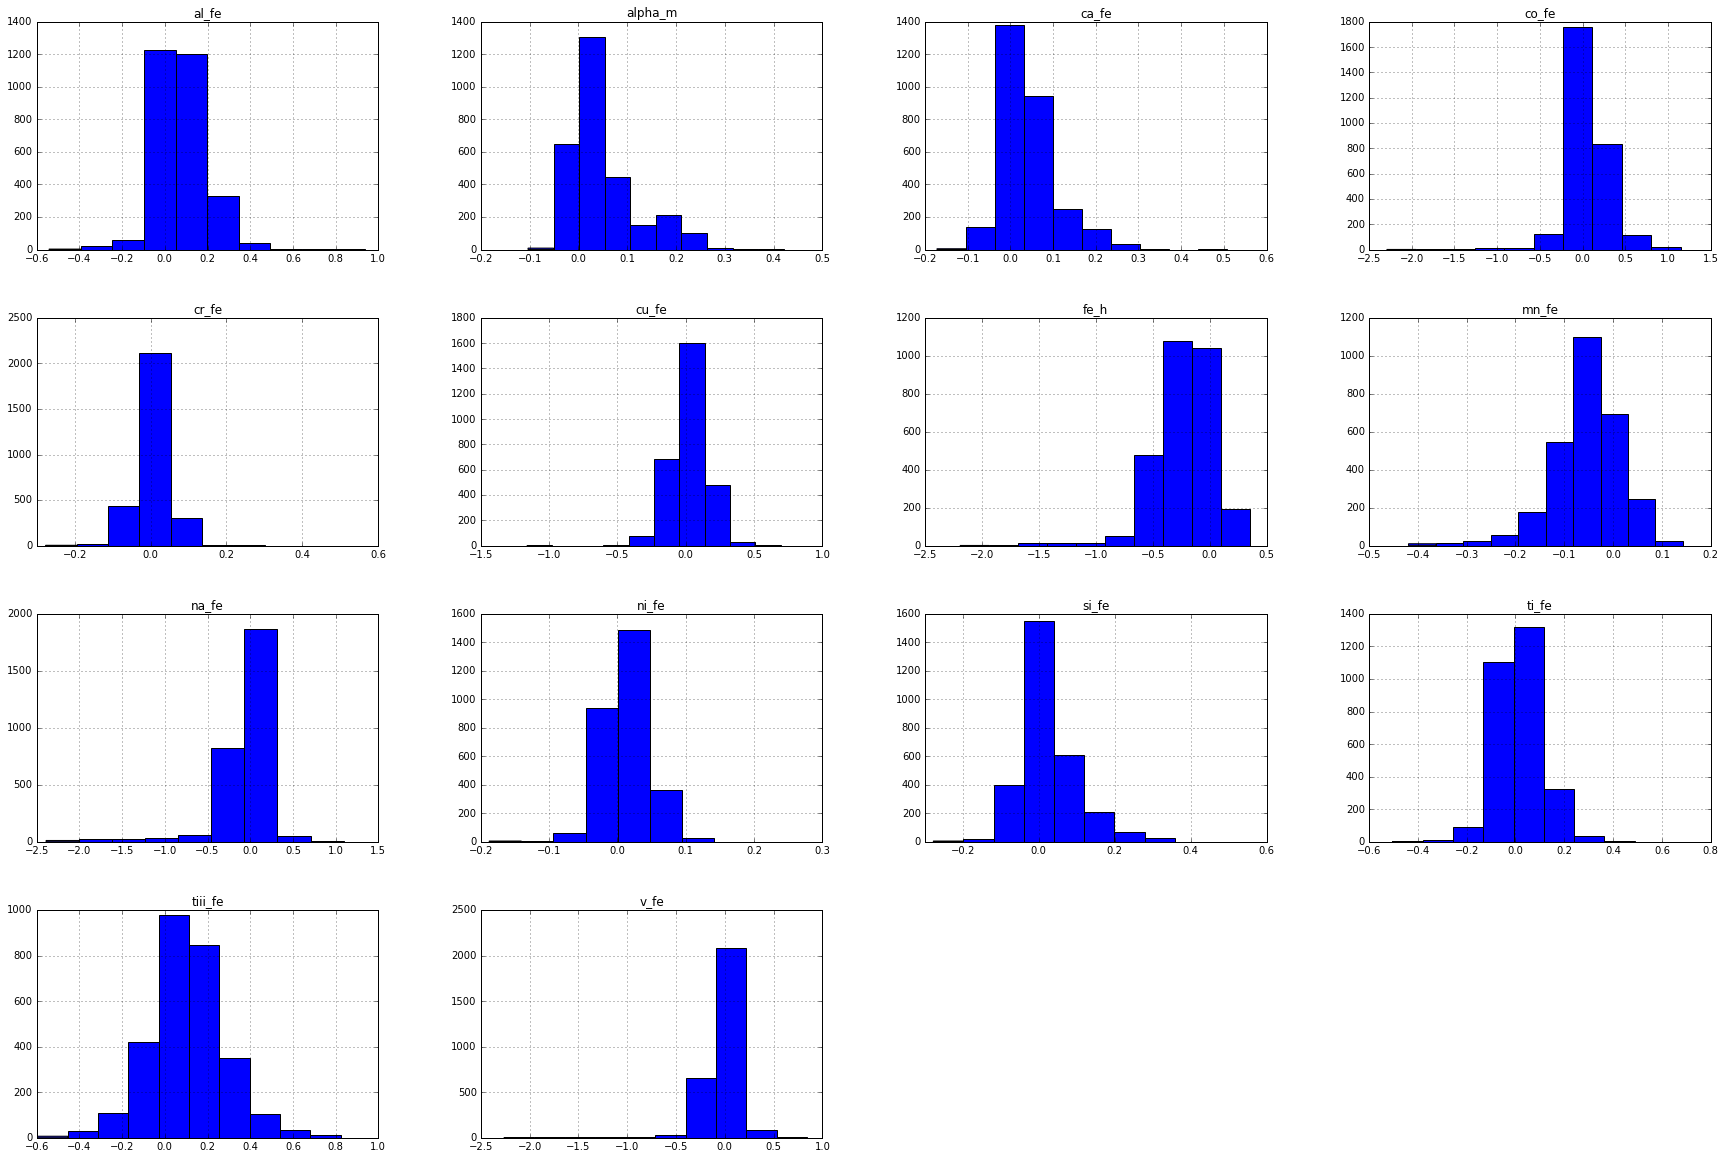

In [11]:
df_clip.hist(figsize=(30,20))

In [12]:
#feature scale the values for a clustering test
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
X=df_clip
X = MinMaxScaler().fit_transform(X)


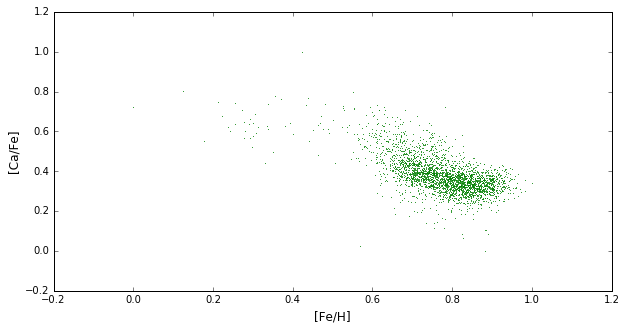

In [13]:
#scaled  metallicity and Ca
plt.scatter(X[:,13], X[:,2], color='green',linewidth=0,s=1)
plt.xlabel(r'[Fe/H]',fontsize=12)
plt.ylabel(r'[Ca/Fe]',fontsize=12)

In [14]:
#get KMeans
clf=KMeans(n_clusters=2)

In [15]:
# predict clustering
pred=clf.fit_predict(X)

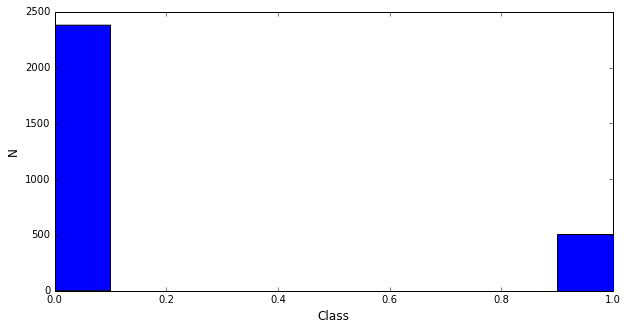

In [16]:
#results?
xx=plt.hist(pred)
plt.xlabel(r'Class',fontsize=12)
plt.ylabel(r'N',fontsize=12)

In [17]:
#add cluster predictions into dataframe
df_clip['pred']=pred
#df_clip

/Users/jcolucci/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


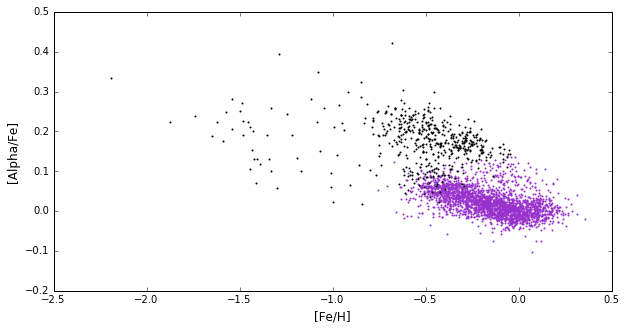

In [18]:
#Show clusters in abundance space
plt.scatter(df_clip[df_clip.pred==0]['fe_h'],df_clip[df_clip.pred==0]['alpha_m'],
            color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['fe_h'],df_clip[df_clip.pred==1]['alpha_m'],color='k',s=1)
#plt.scatter(df_clip[df_clip.pred==2]['fe_h'],df_clip[df_clip.pred==2]['alpha_m'],color='g',s=1)
plt.xlabel(r'[Fe/H]',fontsize=12)
plt.ylabel(r'[Alpha/Fe]',fontsize=12)

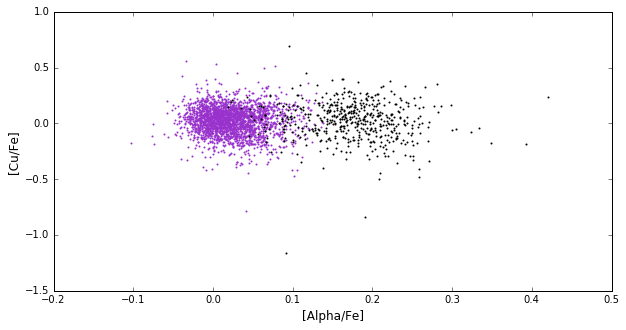

In [19]:
plt.scatter(df_clip[df_clip.pred==0]['alpha_m'],df_clip[df_clip.pred==0]['cu_fe'],
            color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['alpha_m'],df_clip[df_clip.pred==1]['cu_fe'],color='k',s=1)
#plt.scatter(df_clip[df_clip.pred==2]['alpha_m'],df_clip[df_clip.pred==2]['cu_fe'],color='g',s=1)
plt.ylabel(r'[Cu/Fe]',fontsize=12)
plt.xlabel(r'[Alpha/Fe]',fontsize=12)

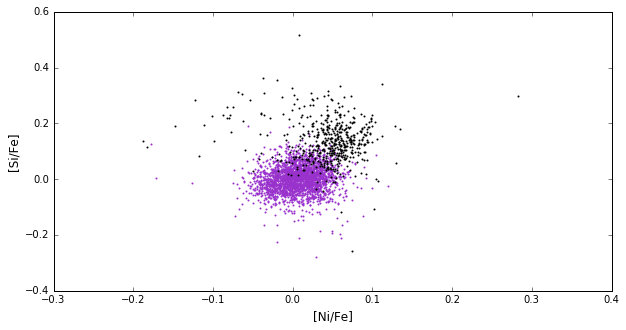

In [20]:
plt.scatter(df_clip[df_clip.pred==0]['ni_fe'],df_clip[df_clip.pred==0]['si_fe'],
            color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['ni_fe'],df_clip[df_clip.pred==1]['si_fe'],
            color='k',s=1)
plt.xlabel(r'[Ni/Fe]',fontsize=12)
plt.ylabel(r'[Si/Fe]',fontsize=12)

In [21]:
mw=pd.read_csv('mw_flat.csv')
m31=pd.read_csv('m31_flat.csv')
#mw

In [22]:
mw_clip=mw.dropna()  
#mw_clip

In [23]:
m31_clip=m31.dropna()  
#m31_clip
df_clip[:10]

,na_fe,al_fe,si_fe,ca_fe,ti_fe,tiii_fe,v_fe,cr_fe,mn_fe,co_fe,ni_fe,cu_fe,alpha_m,fe_h,pred
2,0.137154,0.075186,0.002341,0.034494,-0.029383,-0.075275,-0.022437,-0.028278,0.037198,0.135296,0.019429,0.199860,-0.015164,-0.275844,0
10,-0.000433,0.123294,0.007026,0.012126,0.044659,-0.029201,0.088373,-0.004694,0.028975,0.167603,0.024203,0.145185,0.038596,-0.104227,0
13,0.268721,0.125981,0.231285,0.204951,0.737123,0.134950,0.023020,-0.026611,-0.090558,0.004415,-0.035722,-0.321340,0.195426,-0.303499,1
14,-0.277484,0.243414,0.295250,0.187074,0.289278,0.064232,0.063073,-0.063827,-0.174465,0.220518,-0.013479,0.239629,0.420746,-0.679052,1
17,0.050146,0.027183,-0.067442,0.033801,0.067350,-0.308578,-0.157947,-0.025756,-0.053026,-0.145502,-0.069539,0.286261,-0.020608,-0.191761,0
21,0.108372,0.057114,-0.027922,-0.008917,0.115639,-0.189965,0.069658,0.029929,0.085610,0.156814,0.040223,0.000934,0.018658,0.056324,0
22,0.055482,0.075747,-0.055272,-0.049959,0.066679,0.091831,-0.029992,-0.110100,-0.098103,-0.061247,-0.002855,0.048791,-0.028236,0.023009,0
23,-0.065848,-0.003773,-0.034814,0.012635,-0.059386,-0.055198,-0.116892,-0.118088,0.040718,0.331636,-0.049576,0.026051,-0.022746,0.126599,0
25,0.101725,0.092459,0.013123,-0.045441,0.075069,0.126284,0.071787,0.022608,0.071097,0.196870,0.053248,0.108710,-0.006613,0.156657,0
26,-0.090852,0.104096,-0.042026,0.033721,0.055705,0.037616,0.103507,-0.010750,-0.002245,0.184185,-0.015900,-0.001140,-0.003474,-0.084420,0


In [24]:
Y=m31_clip
Z=mw_clip
Y = MinMaxScaler().fit_transform(Y)
Z = MinMaxScaler().fit_transform(Z)


In [25]:
m31_pred=clf.predict(Y)
mw_pred=clf.predict(Z)

In [26]:
m31_clip['pred']=m31_pred
mw_clip['pred']=mw_pred

#m31_clip

/Users/jcolucci/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jcolucci/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


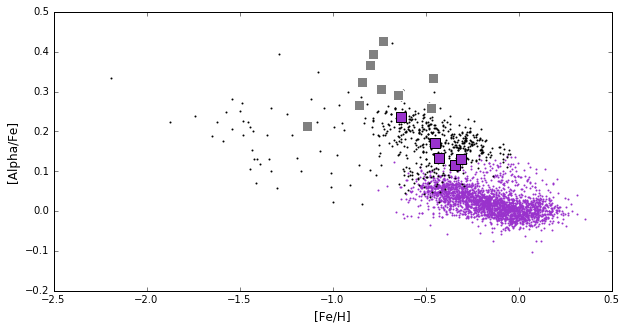

In [27]:
#Show clusters in abundance space
plt.scatter(df_clip[df_clip.pred==0]['fe_h'],df_clip[df_clip.pred==0]['alpha_m'],color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['fe_h'],df_clip[df_clip.pred==1]['alpha_m'],color='k',s=1)

plt.scatter(m31_clip[m31_clip.pred==0]['fe'],m31_clip[m31_clip.pred==0]['alpha'],
    color='darkorchid',s=100,marker='s',linewidth=1,edgecolor='k' )
plt.scatter(m31_clip[m31_clip.pred==1]['fe'],m31_clip[m31_clip.pred==1]['alpha'],
    color='gray',s=100,marker='s',linewidth=1,edgecolor='w')

plt.scatter(mw_clip[mw_clip.pred==0]['fe'],mw_clip[mw_clip.pred==0]['alpha'],color='darkorchid',
            s=100,marker='s',linewidth=1,edgecolor='k') 
plt.scatter(mw_clip[mw_clip.pred==1]['fe'],mw_clip[mw_clip.pred==1]['alpha'],color='gray',s=100,marker='s'
            ,linewidth=1,edgecolor='w')


plt.xlabel(r'[Fe/H]',fontsize=12)
plt.ylabel(r'[Alpha/Fe]',fontsize=12)

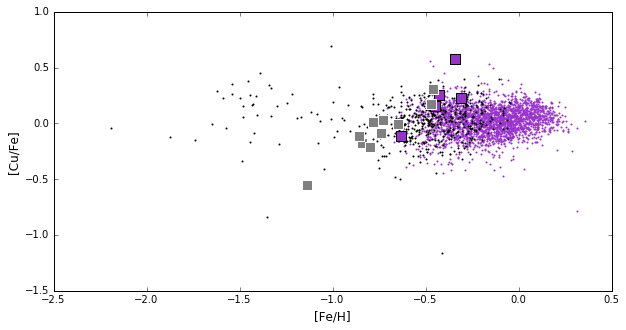

In [28]:
#Show clusters in abundance space
plt.scatter(df_clip[df_clip.pred==0]['fe_h'],df_clip[df_clip.pred==0]['cu_fe'],color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['fe_h'],df_clip[df_clip.pred==1]['cu_fe'],color='k',s=1)

plt.scatter(m31_clip[m31_clip.pred==0]['fe'],m31_clip[m31_clip.pred==0]['Cu'],color='darkorchid'
            ,s=100,marker='s' ,linewidth=1,edgecolor='k')
plt.scatter(m31_clip[m31_clip.pred==1]['fe'],m31_clip[m31_clip.pred==1]['Cu'],color='gray',
            s=100,marker='s',linewidth=1,edgecolor='w')

plt.scatter(mw_clip[mw_clip.pred==0]['fe'],mw_clip[mw_clip.pred==0]['Cu'],color='darkorchid',s=100,marker='s'
            ,linewidth=1,edgecolor='k')
plt.scatter(mw_clip[mw_clip.pred==1]['fe'],mw_clip[mw_clip.pred==1]['Cu'],color='gray',s=100,marker='s'
           ,linewidth=1,edgecolor='w')


plt.ylabel(r'[Cu/Fe]',fontsize=12)
plt.xlabel(r'[Fe/H]',fontsize=12)

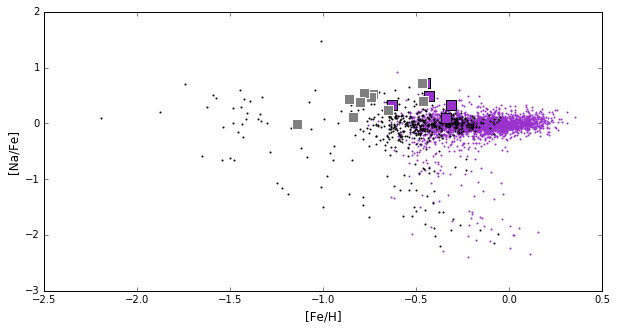

In [29]:
#Show clusters in abundance space
plt.scatter(df_clip[df_clip.pred==0]['fe_h'],df_clip[df_clip.pred==0]['na_fe'],color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['fe_h'],df_clip[df_clip.pred==1]['na_fe'],color='k',s=1)

plt.scatter(m31_clip[m31_clip.pred==0]['fe'],m31_clip[m31_clip.pred==0]['Na'],
            color='darkorchid',s=100,marker='s' ,linewidth=1,edgecolor='k')
plt.scatter(m31_clip[m31_clip.pred==1]['fe'],m31_clip[m31_clip.pred==1]['Na'],
            color='gray',s=100,marker='s',linewidth=1,edgecolor='w')

plt.scatter(mw_clip[mw_clip.pred==0]['fe'],mw_clip[mw_clip.pred==0]['Na'],color='darkorchid',s=100,marker='s'
            ,linewidth=1,edgecolor='k')
plt.scatter(mw_clip[mw_clip.pred==1]['fe'],mw_clip[mw_clip.pred==1]['Na'],color='gray',s=100,marker='s'
           ,linewidth=1,edgecolor='w')


plt.ylabel(r'[Na/Fe]',fontsize=12)
plt.xlabel(r'[Fe/H]',fontsize=12)

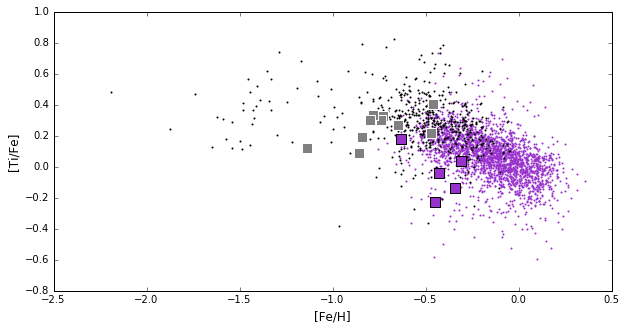

In [30]:
plt.scatter(df_clip[df_clip.pred==0]['fe_h'],df_clip[df_clip.pred==0]['tiii_fe'],color='darkorchid',s=1)

plt.scatter(df_clip[df_clip.pred==1]['fe_h'],df_clip[df_clip.pred==1]['tiii_fe'],color='k',s=1)

plt.scatter(m31_clip[m31_clip.pred==0]['fe'],m31_clip[m31_clip.pred==0]['Ti2'],
            color='darkorchid',s=100,marker='s',linewidth=1,edgecolor='k' )
plt.scatter(m31_clip[m31_clip.pred==1]['fe'],m31_clip[m31_clip.pred==1]['Ti2'],
            color='gray',s=100,marker='s',linewidth=1,edgecolor='w')

plt.scatter(mw_clip[mw_clip.pred==0]['fe'],mw_clip[mw_clip.pred==0]['Ti2'],color='darkorchid',s=100,marker='s'
            ,linewidth=1,edgecolor='k')
plt.scatter(mw_clip[mw_clip.pred==1]['fe'],mw_clip[mw_clip.pred==1]['Ti2'],color='gray',s=100,marker='s'
           ,linewidth=1,edgecolor='w')


plt.ylabel(r'[Ti/Fe]',fontsize=12)
plt.xlabel(r'[Fe/H]',fontsize=12)

In [ ]:
plt.subplot(121)

plt.hist2d(df_clip[df_clip.pred==0]['fe_h'],df_clip[df_clip.pred==0]['alpha_m'], (40, 40),
           cmap=plt.cm.Blues,range=np.array([(-2.5, 0.5), (-0.2, 0.6)]))
plt.colorbar()
plt.xlabel(r'[Fe/H]',fontsize=12)
plt.ylabel(r'[Alpha/Fe]',fontsize=12)
xlim([-2.5, 0.5])
ylim([-0.2, 0.6])
plt.subplot(122)

plt.hist2d(df_clip[df_clip.pred==1]['fe_h'],df_clip[df_clip.pred==1]['alpha_m'], (40, 40), 
           cmap=plt.cm.Blues,range=np.array([(-2.5, 0.5), (-0.2, 0.6)]))
xlim([-2.5, 0.5])
ylim([-0.2, 0.6])
plt.colorbar()
plt.xlabel(r'[Fe/H]',fontsize=12)
plt.ylabel(r'[Alpha/Fe]',fontsize=12)

In [ ]:
fig=plt.figure(1)
plt.clf()
x=df_clip.fe_h
y=df_clip.alpha_m
plt.scatter(x,y,color='darkorchid',s=1)
counts,xbins,ybins=np.histogram2d(x,y,bins=14)
# make the contour plot
mylevels=[10,100,500]

plt.contour(counts.transpose(),mylevels,extent=[xbins.min(),xbins.max(),
    ybins.min(),ybins.max()],linewidths=1,colors='black',
    linestyles='solid')
